#Waymo Open Dataset Tutorial

- Website: https://waymo.com/open
- GitHub: https://github.com/waymo-research/waymo-open-dataset

This tutorial demonstrates how to use the Waymo Open Dataset with two frames of data. Visit the [Waymo Open Dataset Website](https://waymo.com/open) to download the full dataset.

To use, open this notebook in [Colab](https://colab.research.google.com).

Uncheck the box "Reset all runtimes before running" if you run this colab directly from the remote kernel. Alternatively, you can make a copy before trying to run it by following "File > Save copy in Drive ...".



## Install waymo_open_dataset package

In [1]:
!rm -rf waymo-od > /dev/null
!git clone https://github.com/waymo-research/waymo-open-dataset.git waymo-od
!cd waymo-od && git branch -a
!cd waymo-od && git checkout remotes/origin/master
!pip3 install --upgrade pip

Cloning into 'waymo-od'...
remote: Enumerating objects: 1519, done.
remote: Counting objects: 100% (635/635), done.
remote: Compressing objects: 100% (358/358), done.
remote: Total 1519 (delta 398), reused 468 (delta 266), pack-reused 884
Receiving objects: 100% (1519/1519), 37.25 MiB | 7.96 MiB/s, done.
Resolving deltas: 100% (978/978), done.
* master
  remotes/origin/HEAD -> origin/master
  remotes/origin/master
  remotes/origin/om2
  remotes/origin/r1.0
  remotes/origin/r1.0-tf1.15
  remotes/origin/r1.0-tf2.0
  remotes/origin/r1.2
  remotes/origin/r1.3
Note: checking out 'remotes/origin/master'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-bran

In [2]:
!pip3 install waymo-open-dataset-tf-2-6-0

  Using cached waymo_open_dataset_tf_2_6_0-1.4.3-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (14.5 MB)
  Using cached immutabledict-2.2.1-py3-none-any.whl (4.0 kB)
  Using cached plotly-5.6.0-py2.py3-none-any.whl (27.7 MB)
  Using cached matplotlib-3.5.1-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached tensorflow-2.6.0-cp39-cp39-manylinux2010_x86_64.whl (458.4 MB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached wrapt-1.12.1-cp39-cp39-linux_x86_64.whl
  Using cached numpy-1.19.5-cp39-cp39-manylinux2010_x86_64.whl (14.9 MB)
  Using cached h5py-3.1.0-cp39-cp39-manylinux1_x86_64.whl (4.4 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached typing_

In [3]:
import os
import tensorflow.compat.v1 as tf
import math
import numpy as np
import itertools

tf.enable_eager_execution()

from waymo_open_dataset.utils import range_image_utils
from waymo_open_dataset.utils import transform_utils
from waymo_open_dataset.utils import  frame_utils
from waymo_open_dataset import dataset_pb2 as open_dataset

## Read one frame

Each file in the dataset is a sequence of frames ordered by frame start timestamps. We have extracted two frames from the dataset to demonstrate the dataset format.

In [4]:
FILENAME = '/content/waymo-od/tutorial/frames'
FILENAME = '/data0/2022/data/waymo/data/segment-3451017128488170637_5280_000_5300_000_with_camera_labels.tfrecord'
dataset = tf.data.TFRecordDataset(FILENAME, compression_type='')
for data in dataset:
    frame = open_dataset.Frame()
    frame.ParseFromString(bytearray(data.numpy()))
    break

2022-04-04 10:46:46.876125: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-04-04 10:46:46.876176: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-04-04 10:46:46.877613: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-04 10:46:46.925412: I tens

In [6]:
(range_images, camera_projections,
 _, range_image_top_pose) = frame_utils.parse_range_image_and_camera_projection(
    frame)

In [5]:
(range_images, camera_projections, range_image_top_pose) = frame_utils.parse_range_image_and_camera_projection(frame)

ValueError: too many values to unpack (expected 3)

###Examine frame context

Refer to [dataset.proto](https://github.com/waymo-research/waymo-open-dataset/blob/master/waymo_open_dataset/dataset.proto) for the data format. The context contains shared information among all frames in the scene.

In [7]:
print(frame.context)

name: "3451017128488170637_5280_000_5300_000"
camera_calibrations {
  name: FRONT
  intrinsic: 2056.162291989483
  intrinsic: 2056.162291989483
  intrinsic: 954.4857719030827
  intrinsic: 634.4590788500318
  intrinsic: 0.029018265503667724
  intrinsic: -0.31945342518664166
  intrinsic: -0.0001229706076667855
  intrinsic: -0.002090407649630748
  intrinsic: 0.0
  extrinsic {
    transform: 0.999901158472615
    transform: -0.0009097564771053049
    transform: 0.0140301685048675
    transform: 1.5391397722588869
    transform: 0.0006629224556553368
    transform: 0.9998451043818382
    transform: 0.017587716665021992
    transform: -0.02390597423064129
    transform: -0.01404399583239752
    transform: -0.0175766773544851
    transform: 0.9997468812625703
    transform: 2.115723909694812
    transform: 0.0
    transform: 0.0
    transform: 0.0
    transform: 1.0
  }
  width: 1920
  height: 1280
  rolling_shutter_direction: LEFT_TO_RIGHT
}
camera_calibrations {
  name: FRONT_LEFT
  intrins

## Visualize Camera Images and Camera Labels

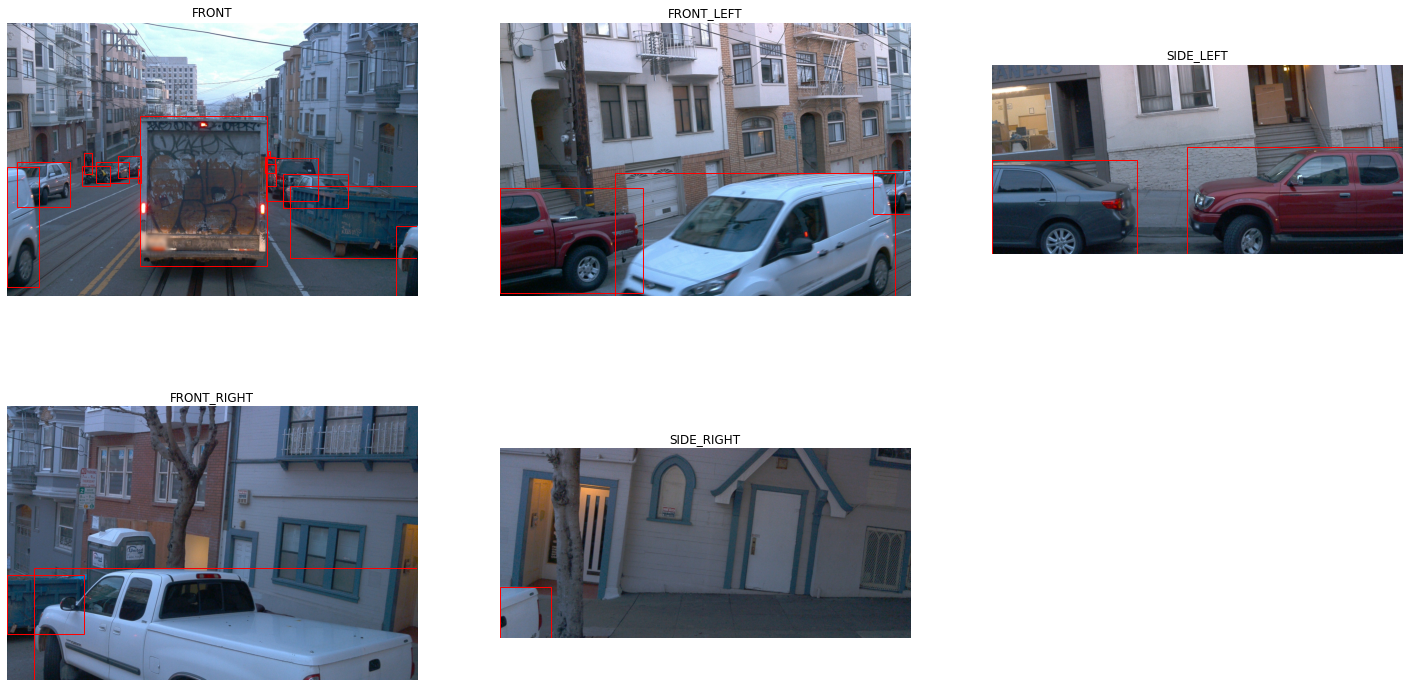

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_camera_image(camera_image, camera_labels, layout, cmap=None):
  """Show a camera image and the given camera labels."""

  ax = plt.subplot(*layout)

  # Draw the camera labels.
  for camera_labels in frame.camera_labels:
    # Ignore camera labels that do not correspond to this camera.
    if camera_labels.name != camera_image.name:
      continue

    # Iterate over the individual labels.
    for label in camera_labels.labels:
      # Draw the object bounding box.
      ax.add_patch(patches.Rectangle(
        xy=(label.box.center_x - 0.5 * label.box.length,
            label.box.center_y - 0.5 * label.box.width),
        width=label.box.length,
        height=label.box.width,
        linewidth=1,
        edgecolor='red',
        facecolor='none'))

  # Show the camera image.
  plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
  plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
  plt.grid(False)
  plt.axis('off')

plt.figure(figsize=(25, 20))

for index, image in enumerate(frame.images):
  show_camera_image(image, frame.camera_labels, [3, 3, index+1])

##Visualize Range Images

(64, 2650)
(64, 2650)


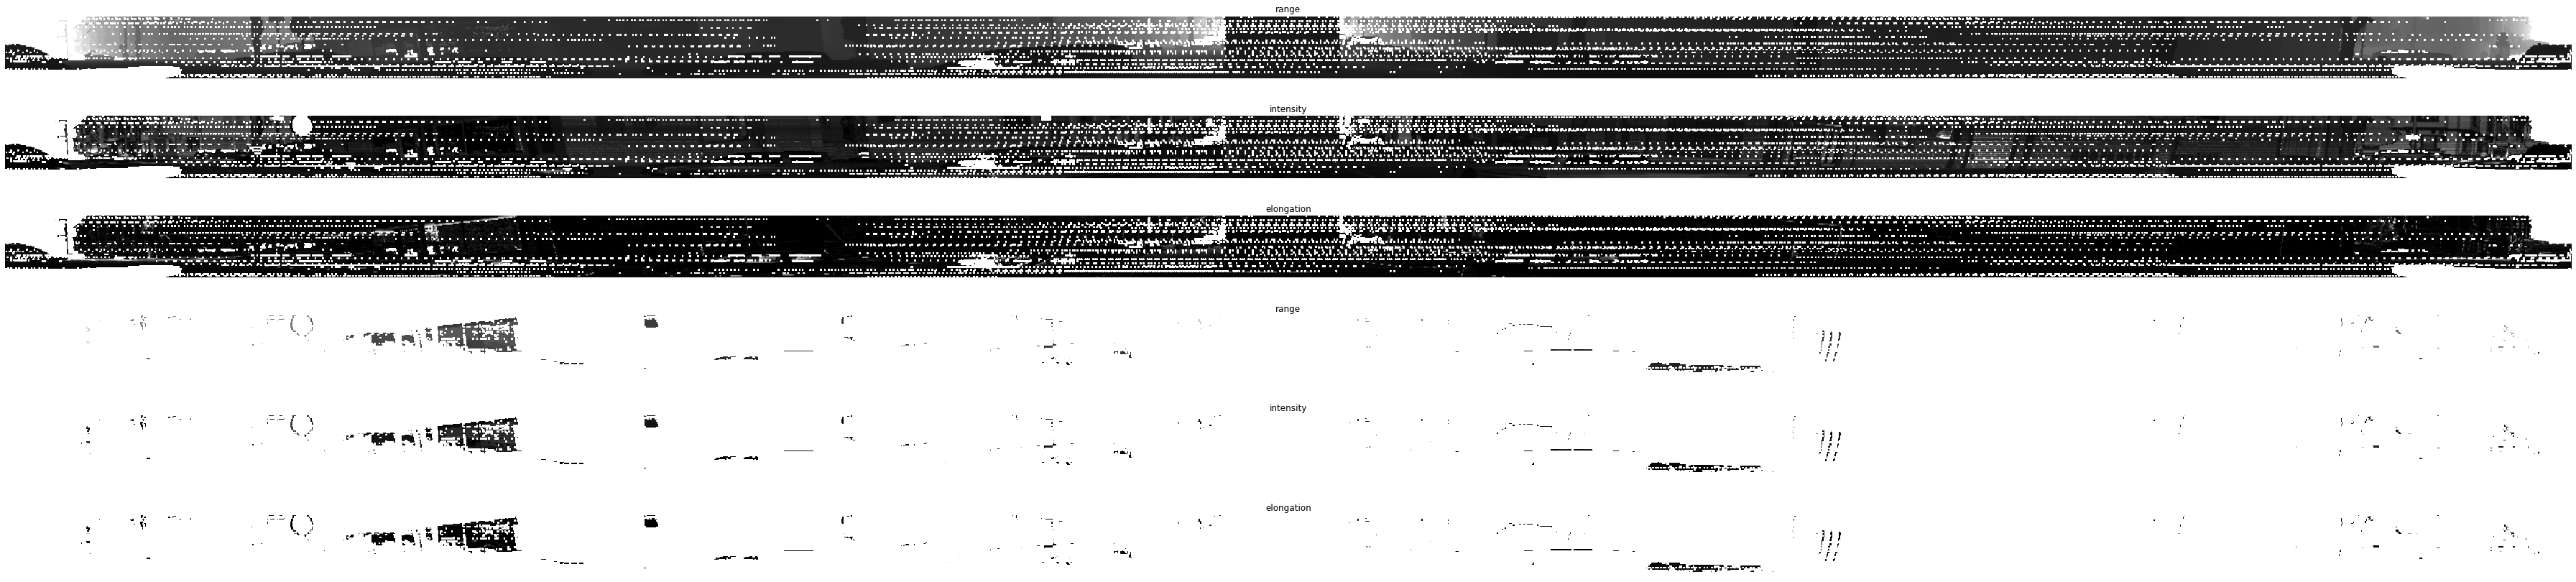

In [56]:
plt.figure(figsize=(64, 20))
def plot_range_image_helper(data, name, layout, vmin = 0, vmax=1, cmap='gray'):
  """Plots range image.

  Args:
    data: range image data
    name: the image title
    layout: plt layout
    vmin: minimum value of the passed data
    vmax: maximum value of the passed data
    cmap: color map
  """
  plt.subplot(*layout)
  plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
  plt.title(name)
  plt.grid(False)
  plt.axis('off')

def get_range_image(laser_name, return_index):
  """Returns range image given a laser name and its return index."""
  return range_images[laser_name][return_index]

def show_range_image(range_image, layout_index_start = 1):
  """Shows range image.

  Args:
    range_image: the range image data from a given lidar of type MatrixFloat.
    layout_index_start: layout offset
  """
  range_image_tensor = tf.convert_to_tensor(range_image.data)
  range_image_tensor = tf.reshape(range_image_tensor, range_image.shape.dims)
  lidar_image_mask = tf.greater_equal(range_image_tensor, 0)
  range_image_tensor = tf.where(lidar_image_mask, range_image_tensor,
                                tf.ones_like(range_image_tensor) * 1e10) # model 마다 수치가 다르기 때문에 visualize 시키기 위한 곱셈 값이 다르다. 5e1 시도.
  range_image_range = range_image_tensor[...,0] 
  range_image_intensity = range_image_tensor[...,1]
  range_image_elongation = range_image_tensor[...,2]
  print(range_image_elongation.numpy().shape)
  plot_range_image_helper(range_image_range.numpy(), 'range',
                   [8, 1, layout_index_start], vmax=75, cmap='gray')
  plot_range_image_helper(range_image_intensity.numpy(), 'intensity',
                   [8, 1, layout_index_start + 1], vmax=1.5, cmap='gray')
  plot_range_image_helper(range_image_elongation.numpy(), 'elongation',
                   [8, 1, layout_index_start + 2], vmax=1.5, cmap='gray')
frame.lasers.sort(key=lambda laser: laser.name)
show_range_image(get_range_image(open_dataset.LaserName.TOP, 0), 1)
show_range_image(get_range_image(open_dataset.LaserName.TOP, 1), 4)
# show_range_image(get_range_image(open_dataset.LaserName.REAR, 0), 1)
# show_range_image(get_range_image(open_dataset.LaserName.FRONT, 0), 1)
# show_range_image(get_range_image(open_dataset.LaserName.TOP, 0), 3)
# show_range_image(get_range_image(open_dataset.LaserName.TOP, 0), 4)
# show_range_image(get_range_image(open_dataset.LaserName.TOP, 0), 5)

In [48]:
range_image = get_range_image(open_dataset.LaserName.REAR, 1)
range_image_tensor = tf.convert_to_tensor(range_image.data)
range_image_tensor = tf.reshape(range_image_tensor, range_image.shape.dims)
range_image_tensor.numpy().shape

(480000,)

##Point Cloud Conversion and Visualization

In [7]:
points, cp_points = frame_utils.convert_range_image_to_point_cloud(
    frame,
    range_images,
    camera_projections,
    range_image_top_pose)
points_ri2, cp_points_ri2 = frame_utils.convert_range_image_to_point_cloud(
    frame,
    range_images,
    camera_projections,
    range_image_top_pose,
    ri_index=1)

# 3d points in vehicle frame.
points_all = np.concatenate(points, axis=0)
points_all_ri2 = np.concatenate(points_ri2, axis=0)
# camera projection corresponding to each point.
cp_points_all = np.concatenate(cp_points, axis=0)
cp_points_all_ri2 = np.concatenate(cp_points_ri2, axis=0)

###Examine number of points in each lidar sensor.

First return.

In [8]:
print(points_all.shape)
print(cp_points_all.shape)
print(points_all[0:2])
for i in range(5):
  print(points[i].shape)
  print(cp_points[i].shape)

(173617, 3)
(173617, 6)
[[-64.131836    7.2597656   4.739624 ]
 [-64.22949     7.901367    4.7452393]]
(155040, 3)
(155040, 6)
(4584, 3)
(4584, 6)
(4690, 3)
(4690, 6)
(4966, 3)
(4966, 6)
(4337, 3)
(4337, 6)


Second return.

In [9]:
print(points_all_ri2.shape)
print(cp_points_all_ri2.shape)
print(points_all_ri2[0:2])
for i in range(5):
  print(points_ri2[i].shape)
  print(cp_points_ri2[i].shape)

(10001, 3)
(10001, 6)
[[-55.94922   11.653198   4.445923]
 [-54.601562  12.769897   4.402466]]
(9844, 3)
(9844, 6)
(42, 3)
(42, 6)
(35, 3)
(35, 6)
(49, 3)
(49, 6)
(31, 3)
(31, 6)


###Show point cloud
3D point clouds are rendered using an internal tool, which is unfortunately not publicly available yet. Here is an example of what they look like.

In [ ]:
from IPython.display import Image, display
display(Image('/content/waymo-od/tutorial/3d_point_cloud.png'))

##Visualize Camera Projection

In [10]:
images = sorted(frame.images, key=lambda i:i.name)
cp_points_all_concat = np.concatenate([cp_points_all, points_all], axis=-1)
cp_points_all_concat_tensor = tf.constant(cp_points_all_concat)

# The distance between lidar points and vehicle frame origin.
points_all_tensor = tf.norm(points_all, axis=-1, keepdims=True)
cp_points_all_tensor = tf.constant(cp_points_all, dtype=tf.int32)

mask = tf.equal(cp_points_all_tensor[..., 0], images[0].name)

cp_points_all_tensor = tf.cast(tf.gather_nd(
    cp_points_all_tensor, tf.where(mask)), dtype=tf.float32)
points_all_tensor = tf.gather_nd(points_all_tensor, tf.where(mask))

projected_points_all_from_raw_data = tf.concat(
    [cp_points_all_tensor[..., 1:3], points_all_tensor], axis=-1).numpy()

In [11]:
def rgba(r):
  """Generates a color based on range.

  Args:
    r: the range value of a given point.
  Returns:
    The color for a given range
  """
  c = plt.get_cmap('jet')((r % 20.0) / 20.0)
  c = list(c)
  c[-1] = 0.5  # alpha
  return c

def plot_image(camera_image):
  """Plot a cmaera image."""
  plt.figure(figsize=(20, 12))
  plt.imshow(tf.image.decode_jpeg(camera_image.image))
  plt.grid("off")

def plot_points_on_image(projected_points, camera_image, rgba_func,
                         point_size=5.0):
  """Plots points on a camera image.

  Args:
    projected_points: [N, 3] numpy array. The inner dims are
      [camera_x, camera_y, range].
    camera_image: jpeg encoded camera image.
    rgba_func: a function that generates a color from a range value.
    point_size: the point size.

  """
  plot_image(camera_image)

  xs = []
  ys = []
  colors = []

  for point in projected_points:
    xs.append(point[0])  # width, col
    ys.append(point[1])  # height, row
    colors.append(rgba_func(point[2]))

  plt.scatter(xs, ys, c=colors, s=point_size, edgecolors="none")

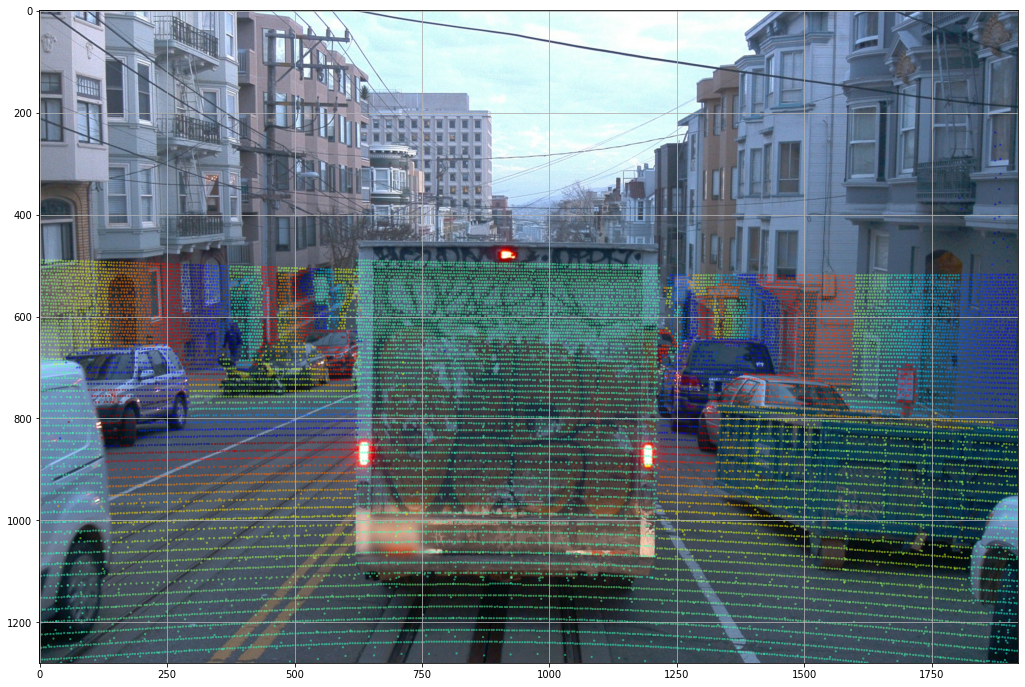

In [12]:
plot_points_on_image(projected_points_all_from_raw_data,
                     images[0], rgba, point_size=5.0)

## Install from source code

The remaining part of this colab covers details of installing the repo form source code which provides a richer API.

### Install dependencies

In [ ]:
!sudo apt install build-essential
!sudo apt-get install --assume-yes pkg-config zip g++ zlib1g-dev unzip python3 python3-pip
!wget https://github.com/bazelbuild/bazel/releases/download/0.28.0/bazel-0.28.0-installer-linux-x86_64.sh
!sudo bash ./bazel-0.28.0-installer-linux-x86_64.sh

###Build and test (this can take 10 mins)

Configure .bazelrc. This works with/without Tensorflow. This colab machine has Tensorflow installed.

In [ ]:
!cd waymo-od && ./configure.sh && cat .bazelrc && bazel clean

In [ ]:
!cd waymo-od && bazel build ... --show_progress_rate_limit=10.0

### Metrics computation
The core metrics computation library is written in C++, so it can be extended to other programming languages. It can compute detection metrics (mAP) and tracking metrics (MOTA). See more information about the metrics on the [website](https://waymo.com/open/next/).

We provide command line tools and TensorFlow ops to call the detection metrics library to compute detection metrics. We will provide a similar wrapper for tracking metrics library in the future. You are welcome to contribute your wrappers.

#### Command line detection metrics computation

The command takes a pair of files for prediction and ground truth. Read the comment in waymo_open_dataset/metrics/tools/compute_detection_metrics_main.cc for details of the data format.

In [ ]:
!cd waymo-od && bazel-bin/waymo_open_dataset/metrics/tools/compute_detection_metrics_main waymo_open_dataset/metrics/tools/fake_predictions.bin  waymo_open_dataset/metrics/tools/fake_ground_truths.bin

#### TensorFlow custom op

A TensorFlow op is defined at metrics/ops/metrics_ops.cc. We provide a python wrapper of the op at metrics/ops/py_metrics_ops.py, and a tf.metrics-like implementation of the op at metrics/python/detection_metrics.py. This library requires TensorFlow to be installed.

Install TensorFlow and NumPy.

In [ ]:
!pip3 install numpy tensorflow

Reconfigure .bazelrc such that you can compile the TensorFlow ops

In [ ]:
!cd waymo-od && ./configure.sh && cat .bazelrc

Run the op and tf.metrics wrapper unit tests which can be referenced as example usage of the libraries.

In [ ]:
!cd waymo-od && bazel test waymo_open_dataset/metrics/ops/... && bazel test waymo_open_dataset/metrics/python/...

Run all tests in the repo.

In [ ]:
!cd waymo-od && bazel test ...

### Build local PIP package

In [ ]:
!cd waymo-od && export PYTHON_VERSION=3 && ./pip_pkg_scripts/build.sh

You can install the locally compiled package or access any c++ binary compiled from this.